### Tekoälyn käytön kuvaus työn suorittamisessa

ChatGPT:tä käytettiin työn suorittamisen aikana apuvälineenä. Sen avulla täsmennettiin raportin rakennetta, muokattiin tekstin muotoiluja akateemisempaan tyyliin sekä käännettiin työn teksti suomen kielelle.

Lisäksi ChatGPT:tä hyödynnettiin käytettyjen menetelmien ja funktioiden selittämisessä sekä saatujen tulosten tulkinnan tukena. Decision tree- ja random forest -mallit valittiin kurssitehtävän mukaisesti, ja niiden opetus, hyperparametrien valinta sekä tulosten arviointi tehtiin työn tekijän toimesta saatujen ohjeiden ja esimerkkien perusteella.

Työ toteutettiin vuorovaikutuksessa tekoälyn kanssa, mikä auttoi ymmärtämään ratkaisuprosessin logiikkaa ja analyysin eri vaiheiden välisiä yhteyksiä. Ilman valmista esimerkkiä koko työn toistaminen alusta alkaen voisi olla haastavaa, mutta työn keskeiset vaiheet ja niiden tarkoitus on omaksuttu ja ymmärretty.

# 1. Business Understanding

Tämän työn tavoitteena on selvittää, onko mahdollista luotettavasti ennustaa, onko verkkosivusto tietojenkalastelusivusto (phishing) vai laillinen sivusto, käyttäen helposti saatavilla olevaa verkkosivustoon liittyvää tietoa.
Tämän tehtävän ratkaisemiseksi käytetään decision tree- ja random forest -menetelmiä, joiden avulla voidaan rakentaa tulkittavia ja tehokkaita luokittelumalleja.

# 2. Data Understanding

Tässä vaiheessa aineisto ladataan ja sen rakennetta tarkastellaan alustavasti.
Tarvittavat kirjastot otetaan käyttöön, minkä jälkeen aineisto ladataan ja sen keskeisiä ominaisuuksia analysoidaan.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/static/public/327/data.csv')
df

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [2]:
df.describe()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   having_ip_address           11055 non-null  int64
 1   url_length                  11055 non-null  int64
 2   shortining_service          11055 non-null  int64
 3   having_at_symbol            11055 non-null  int64
 4   double_slash_redirecting    11055 non-null  int64
 5   prefix_suffix               11055 non-null  int64
 6   having_sub_domain           11055 non-null  int64
 7   sslfinal_state              11055 non-null  int64
 8   domain_registration_length  11055 non-null  int64
 9   favicon                     11055 non-null  int64
 10  port                        11055 non-null  int64
 11  https_token                 11055 non-null  int64
 12  request_url                 11055 non-null  int64
 13  url_of_anchor               11055 non-null  int64
 14  links_

In [4]:
cols = []
for col in df.columns:
    cols.append(col)
print(cols)
print(len(cols))

['having_ip_address', 'url_length', 'shortining_service', 'having_at_symbol', 'double_slash_redirecting', 'prefix_suffix', 'having_sub_domain', 'sslfinal_state', 'domain_registration_length', 'favicon', 'port', 'https_token', 'request_url', 'url_of_anchor', 'links_in_tags', 'sfh', 'submitting_to_email', 'abnormal_url', 'redirect', 'on_mouseover', 'rightclick', 'popupwindow', 'iframe', 'age_of_domain', 'dnsrecord', 'web_traffic', 'page_rank', 'google_index', 'links_pointing_to_page', 'statistical_report', 'result']
31


Aineisto sisältää 31 saraketta (kaikki muuttujat ovat numeerisia) ja 11 055 havaintoa.
Sarake Result, jonka arvot ovat 1 (legitimate) ja −1 (phishing), toimii kohdemuuttujana (target variable / y).
Muut sarakkeet edustavat selittäviä muuttujia (features / X), joiden perusteella kohdemuuttujaa ennustetaan.

# 3. Data Preparation

Tässä vaiheessa aineisto valmistellaan mallien koulutusta varten.
Tulkinnan helpottamiseksi kohdemuuttuja muunnetaan, minkä jälkeen aineisto jaetaan selittäviin muuttujiin (X) ja kohdemuuttujaan (y) sekä edelleen opetus- ja testiaineistoihin.

Aineistosta tarkistetaan puuttuvat arvot, ja tarvittaessa kyseiset havainnot poistetaan.

In [5]:
df.dropna(axis=0, how='any', inplace=True)

Sarake result muunnetaan helpommin tulkittavaan muotoon.
Koska tavoitteena on tunnistaa tietojenkalastelusivustot, käytetään seuraavaa koodausta:
1 — phishing
0 — legitimate

In [6]:
df['result'] = df['result'].map({1: 0, -1: 1})

Tämän jälkeen aineisto jaetaan kohdemuuttujaan (y) ja numeerisiin selittäviin muuttujiin (X).

In [7]:
X = df.drop(columns=['result'])
y = df['result']

Seuraavaksi aineisto jaetaan opetus- ja testiaineistoihin suhteessa 70 % / 30 %.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

Valmisteltua aineistoa käytetään luokittelumallien kouluttamiseen ja arviointiin.

# 4. Modeling

Tässä vaiheessa rakennetaan luokittelumallit decision tree- ja random forest -menetelmien pohjalta.
Kullekin mallille suoritetaan opetus opetusjoukolla sekä rakenteen visualisointi (päätöspuun osalta).

## 4.1. Decision tree

Suoritetaan parametrin max_depth valinta decision tree -mallille käyttäen ristiinvalidointia.

In [9]:
depths = range(1, 11)
scores = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    cv = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1') 
    scores.append((d, cv.mean(), cv.std()))

scores

[(1, 0.873372246273339, 0.009893818029889718),
 (2, 0.8960513669193941, 0.008707488623900798),
 (3, 0.9029198772943303, 0.010362360638124348),
 (4, 0.9072968499042855, 0.008534279973695762),
 (5, 0.9066634584593786, 0.009461723643241405),
 (6, 0.9204530849125903, 0.0025911010666594533),
 (7, 0.9218240795465368, 0.004618299522641593),
 (8, 0.9268405522707385, 0.00452619988631926),
 (9, 0.934613396278924, 0.005868582632530891),
 (10, 0.94146745906903, 0.006789193907513912)]

Parametrin valinnassa käytettynä mittarina oli F1-score, koska tehtävä on binaarinen luokittelutehtävä, jonka painopisteenä on tietojenkalastelusivustojen tunnistaminen.

Suurin tarkkuus saavutetaan arvolla max_depth = 10, mutta tällöin saatu malli osoittautuu liian monimutkaiseksi ihmisen tulkittavaksi. Tässä työssä tulkittavan mallin rakentamiseksi valittiin arvo max_depth = 4, mikä johtaa noin 4 %:n laskuun F1-score-arvossa, mutta huomattavasti yksinkertaisempaan puun rakenteeseen.

Seuraavaksi luodaan ja opetetaan decision tree -malli.

In [10]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Visualisoidaan ennustepuumme.

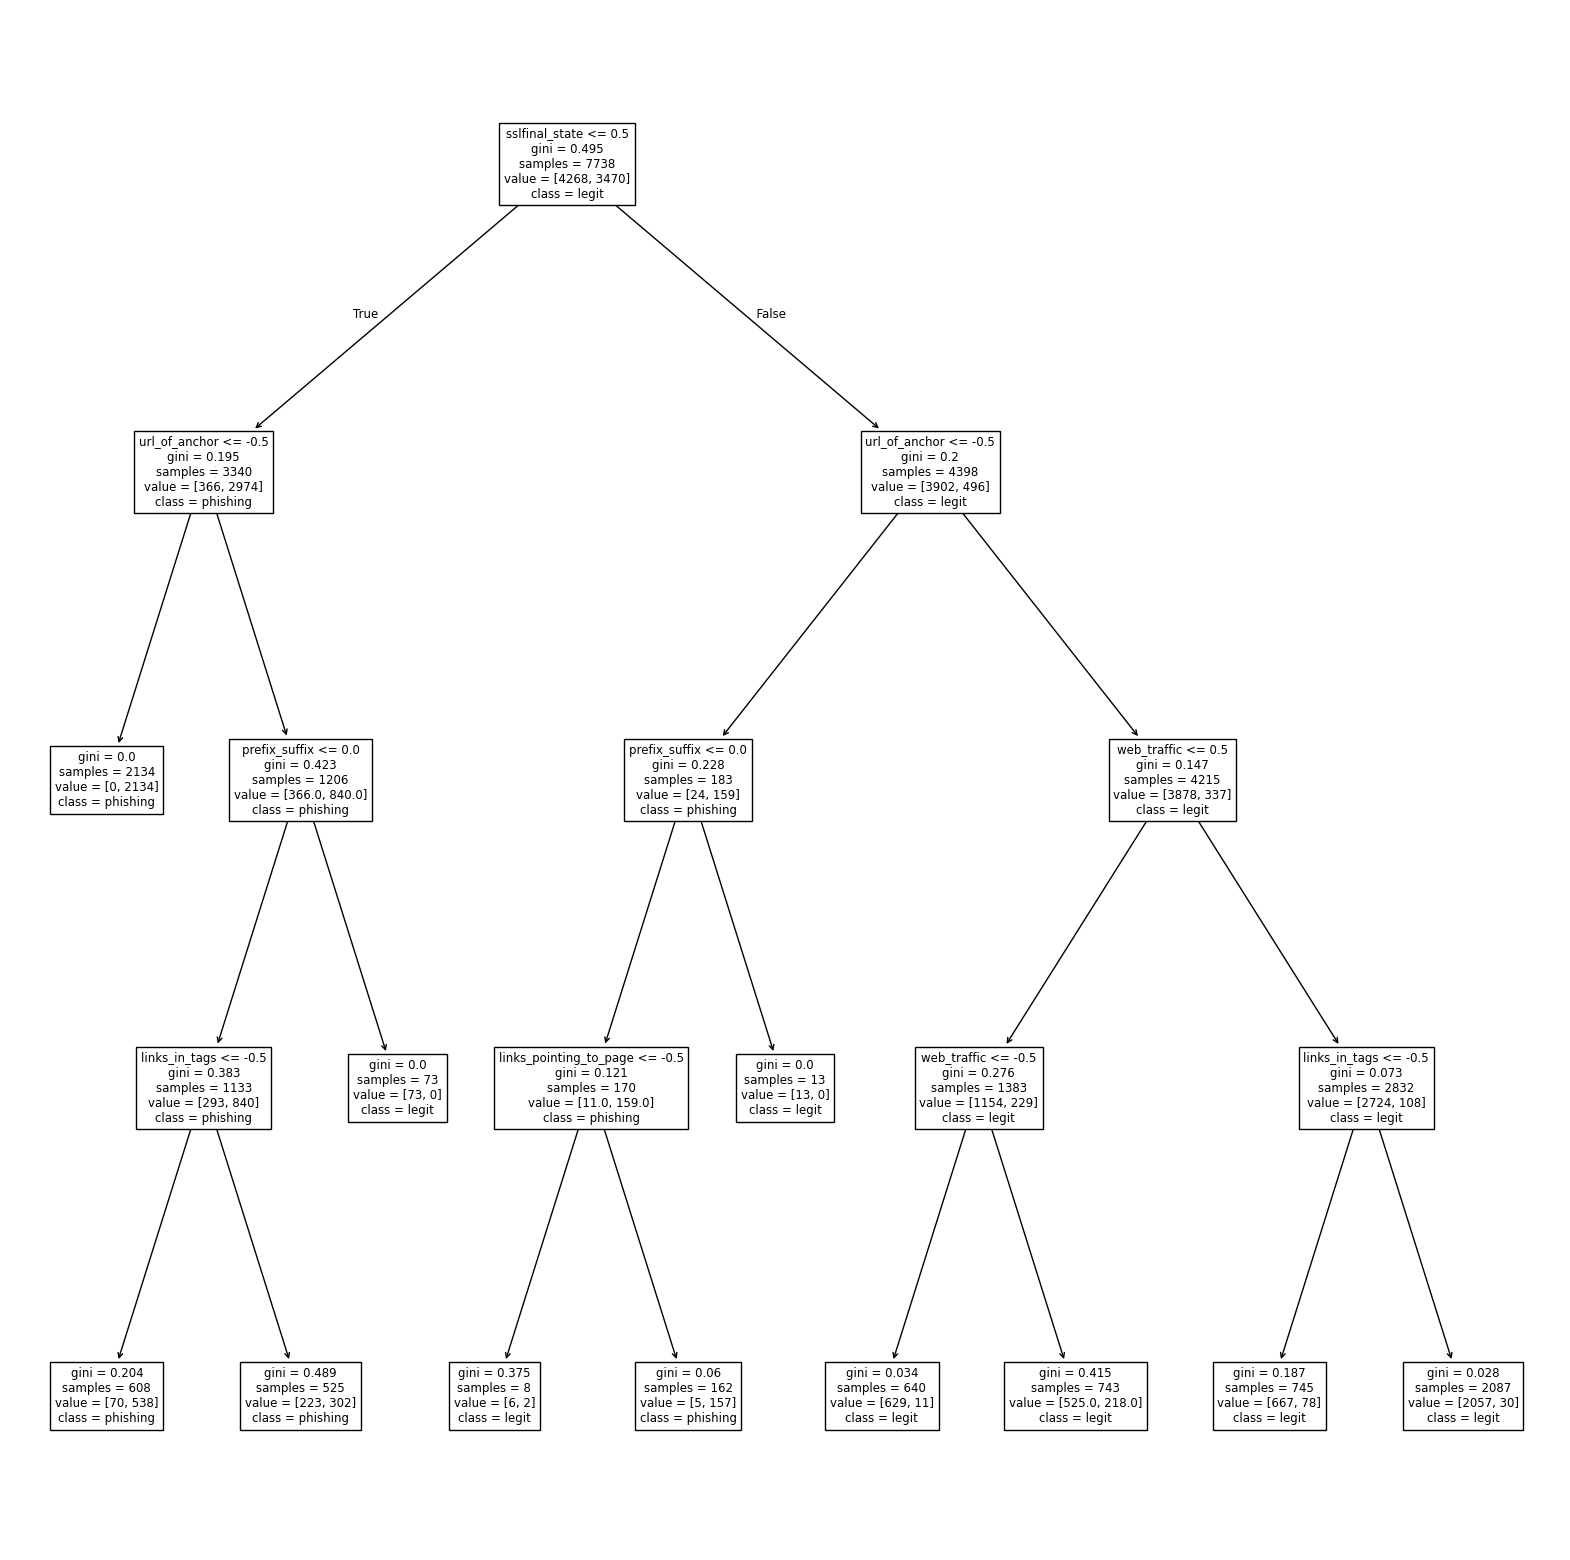

In [11]:
fig = plt.figure(figsize = (20, 20))
plot_tree(model, feature_names= X.keys(), class_names=['legit', 'phishing'])
plt.show()

Ohjeet verkkosivuston manuaaliseen luokitteluun päätöspuun perusteella

Rakennetun päätöspuun perusteella verkkosivuston luokittelu voidaan esittää seuraavien sääntöjen muodossa:

1. Tarkista SSL-yhteyden tila (HTTPS).
Jos sivuston SSL-varmenne puuttuu tai vaikuttaa epäluotettavalta, sivusto luokitellaan suurella todennäköisyydellä tietojenkalastelusivustoksi (phishing).

2. Jos SSL-yhteys on epäilyttävä, tarkastele ankkurilinkkien rakennetta (url_of_anchor).
Mikäli ankkurilinkit osoittavat poikkeaviin tai epäilyttäviin osoitteisiin, sivusto luokitellaan todennäköisesti tietojenkalastelusivustoksi.

3. Analysoi verkkotunnuksen rakenne (prefix_suffix).
Epätavallisten etu- tai jälkiliitteiden esiintyminen verkkotunnuksessa lisää todennäköisyyttä, että kyseessä on tietojenkalastelusivusto.

4. Tarkista linkkien rakenne HTML-tageissa (links_in_tags).
Jos linkkien sijoittelu tai määrä HTML-rakenteessa poikkeaa normaalista, tämä toimii lisäindikaattorina tietojenkalastelusta.

5. Jos SSL-yhteys on kunnossa, arvioi sivuston verkkoliikenne (web_traffic).
Sivustot, joilla on normaali tai korkea verkkoliikenne ja asianmukainen linkkirakenne, luokitellaan useimmiten laillisiksi (legitimate).

Näiden peräkkäisten tarkistusten avulla verkkosivusto voidaan luokitella joko tietojenkalastelusivustoksi tai lailliseksi sivustoksi sen teknisten ominaisuuksien perusteella.

## 4.2. Random Forest

Valitaan paras puiden syvyyden parametri Random Forest -mallille.

In [12]:
depths = [None, 3, 5, 7, 10, 15]
scores = []

for d in depths:
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=d,
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
    scores.append((d, cv_scores.mean(), cv_scores.std()))

for depth, mean_score, std_score in scores:
    print(f"max_depth={depth}, F1-score={mean_score:.4f} (+/- {std_score:.4f})")

max_depth=None, F1-score=0.9643 (+/- 0.0039)
max_depth=3, F1-score=0.9167 (+/- 0.0083)
max_depth=5, F1-score=0.9195 (+/- 0.0088)
max_depth=7, F1-score=0.9304 (+/- 0.0074)
max_depth=10, F1-score=0.9489 (+/- 0.0058)
max_depth=15, F1-score=0.9636 (+/- 0.0045)


Paras keskimääräinen F1-score-arvo saatiin, kun max_depth = None, mikä tarkoittaa, ettei puiden syvyyttä rajoiteta. Tämän vuoksi kyseistä parametria ei asetettu erikseen lopullisessa mallissa.

Lisäksi suoritetaan parametrien max_features ja max_samples valinta, jotka määrittävät kunkin puun rakentamisessa käytettävien piirteiden ja havaintojen määrän.

In [13]:
max_features_list = [0.5, 0.75, 'sqrt']
max_samples_list = [0.5, 0.7, 1.0]

scores = []

for mf in max_features_list:
    for ms in max_samples_list:
        rf = RandomForestClassifier(
            n_estimators=100,
            max_depth=None,
            max_features=mf,
            max_samples=ms,
            random_state=42,
            n_jobs=-1
        )
        cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
        scores.append((mf, ms, cv_scores.mean(), cv_scores.std()))

for mf, ms, mean_score, std_score in scores:
    print(f"max_features={mf}, max_samples={ms}, F1-score={mean_score:.4f} (+/- {std_score:.4f})")


max_features=0.5, max_samples=0.5, F1-score=0.9612 (+/- 0.0047)
max_features=0.5, max_samples=0.7, F1-score=0.9623 (+/- 0.0037)
max_features=0.5, max_samples=1.0, F1-score=0.9637 (+/- 0.0032)
max_features=0.75, max_samples=0.5, F1-score=0.9627 (+/- 0.0034)
max_features=0.75, max_samples=0.7, F1-score=0.9609 (+/- 0.0044)
max_features=0.75, max_samples=1.0, F1-score=0.9628 (+/- 0.0040)
max_features=sqrt, max_samples=0.5, F1-score=0.9611 (+/- 0.0054)
max_features=sqrt, max_samples=0.7, F1-score=0.9649 (+/- 0.0029)
max_features=sqrt, max_samples=1.0, F1-score=0.9643 (+/- 0.0039)


Parametrien max_features ja max_samples valinta ei johtanut merkittävään parannukseen mallin suorituskyvyssä. F1-score-arvot kaikissa tarkastelluissa yhdistelmissä poikkeavat toisistaan vain vähän. Tämä viittaa siihen, että random forest -malli on näiden hyperparametrien suhteen vakaa tässä aineistossa. Lopullisessa mallissa valittiin parametrit max_features = 0.75 ja max_samples = 0.7 (samat kuin opetustunnilla).
Parametria n_jobs = -1 käytettiin puiden rinnakkaiseen opettamiseen kaikkia käytettävissä olevia prosessoriytimiä hyödyntäen.

Luodaan meidän metsämme.

In [14]:
model2 = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, max_features=0.75, random_state=42, oob_score=True)
model2.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.75
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


Ja visualisoidaan osa siitä.

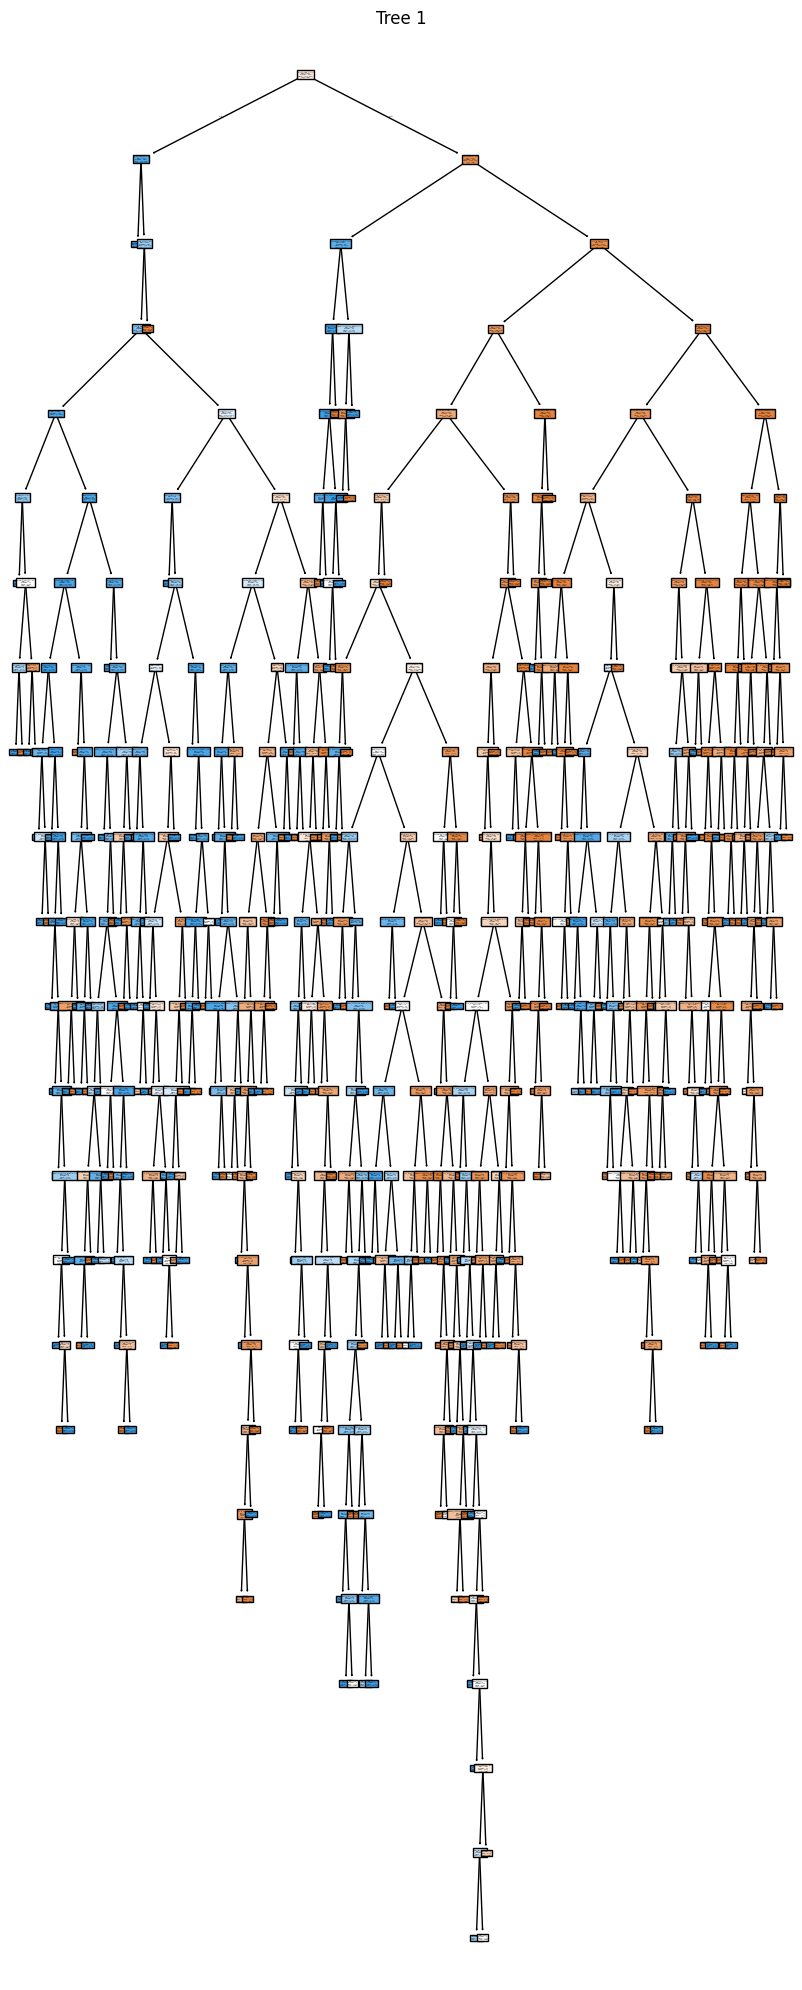

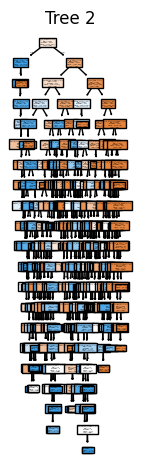

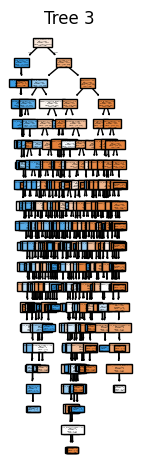

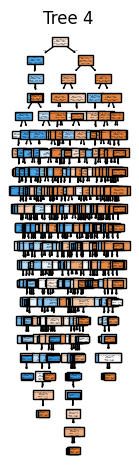

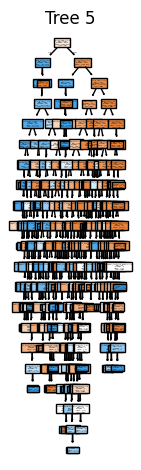

In [15]:
n_trees_to_plot = 5

plt.figure(figsize=(40, 20))

for i in range(n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i + 1)
    plot_tree(model2.estimators_[i], filled=True, feature_names=X.keys(), class_names=['legit', 'phishing'])
    plt.title(f'Tree {i + 1}')
    plt.tight_layout()
    plt.show()

Saadut puut ovat rakenteeltaan monimutkaisia eivätkä ole visuaalisesti helposti tulkittavissa, mikä on odotettavaa random forest -mallille. Mallien laadun arviointi suoritetaan seuraavassa osiossa numeeristen mittareiden perusteella.

# 5. Evaluation

Tässä vaiheessa arvioidaan decision tree- ja random forest -mallien ennustusten laatua sekä verrataan niiden suorituskykyä.

Molemmille malleille lasketaan virhematriisi (confusion matrix).

In [16]:
preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[1754,  135],
       [ 136, 1292]], dtype=int64)

In [17]:
preds2 = model2.predict(X_test)
confusion_matrix(y_test, preds2)

array([[1852,   37],
       [  71, 1357]], dtype=int64)

Luokittelun laadun yksityiskohtaisempaa analyysiä varten tulostetaan classification_report.

In [18]:
print("Decision Tree:")
print(classification_report(y_test, preds))

Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1889
           1       0.91      0.90      0.91      1428

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



In [19]:
print("Random Forest:")
print(classification_report(y_test, preds2))

Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1889
           1       0.97      0.95      0.96      1428

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



Mallien vertailun helpottamiseksi keskeiset mittarit kootaan taulukkoon.

In [20]:
def metrics(y_value, preds_value):
    return {
        "accuracy": accuracy_score(y_value, preds_value),
        "precision": precision_score(y_value, preds_value),
        "recall": recall_score(y_value, preds_value),
        "f1": f1_score(y_value, preds_value)
    }

dtree_metrics = metrics(y_test, preds)
rforest_metrics = metrics(y_test, preds2)

dtree_metrics, rforest_metrics

({'accuracy': 0.9182996683750377,
  'precision': 0.905395935529082,
  'recall': 0.9047619047619048,
  'f1': 0.9050788091068301},
 {'accuracy': 0.9674404582454025,
  'precision': 0.9734576757532282,
  'recall': 0.9502801120448179,
  'f1': 0.9617292700212615})

Ja itse taulukko.

In [21]:
pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [dtree_metrics['accuracy'], rforest_metrics['accuracy']],
    "Precision": [dtree_metrics['precision'], rforest_metrics['precision']],
    "Recall": [dtree_metrics['recall'], rforest_metrics['recall']],
    "F1-score": [dtree_metrics['f1'], rforest_metrics['f1']]
})

,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.91830,0.905396,0.904762,0.905079
1,Random Forest,0.96744,0.973458,0.950280,0.961729


Random forest -malli osoittaa korkeammat arvot kaikissa keskeisissä luokittelumittareissa verrattuna decision tree -malliin. Erityisesti F1-score-arvo kasvoi noin 0.90:stä 0.96:een.

# 6. Deployment

Tässä työssä tarkasteltiin tehtävää, jossa tavoitteena oli tunnistaa automaattisesti tietojenkalastelusivustot verkkosivuston numeeristen ominaisuuksien perusteella. Tehtävän ratkaisemiseksi rakennettiin ja analysoitiin kaksi luokittelumallia: decision tree ja random forest.

Decision tree -mallille suoritettiin puun syvyyden valinta tulkittavan rakenteen saavuttamiseksi, joka soveltuu manuaaliseen analyysiin. Random forest -mallille puolestaan suoritettiin keskeisten hyperparametrien valinta ristiinvalidointia hyödyntäen.

Laadunarvioinnin tulokset osoittivat, että random forest -malli suoriutuu paremmin kuin yksittäinen päätöspuu kaikilla keskeisillä luokittelumittareilla, mukaan lukien precision, recall ja F1-score. Tämä viittaa siihen, että ensemble-mallilla on parempi yleistämiskyky ja vakaampi suorituskyky.

Saadut tulokset vahvistavat, että verkkosivuston saatavilla olevien ominaisuuksien perusteella on mahdollista ennustaa melko luotettavasti, onko sivusto tietojenkalastelusivusto vai laillinen sivusto. Tämän vuoksi tällaisia malleja voidaan hyödyntää automatisoiduissa järjestelmissä, jotka varoittavat käyttäjiä mahdollisesti vaarallisista verkkosivustoista.

Samanaikaisesti decision tree -mallin etuna on sen tulkittavuus, joka mahdollistaa yksinkertaisten ja selkeiden sääntöjen muodostamisen verkkosivustojen manuaalista analyysia varten. Tämä tekee siitä hyödyllisen erityisesti tilanteissa, joissa päätöksenteon selitettävyys on tärkeää.

On syytä huomata, että päätöspuun syvyyden kasvattaminen arvoon max_depth = 10 parantaa sen suorituskykyä siten, että F1-score-arvo lähestyy random forest -mallin tulosta (noin 0.94 verrattuna 0.96:een). Tämä osoittaa, että yksittäinen päätöspuu voi riittävän syvänä saavuttaa lähes vastaavan luokittelutarkkuuden. Tällöin malli kuitenkin menettää tulkittavuutensa ja muuttuu huomattavasti monimutkaisemmaksi, mikä heikentää sen käytännön hyödyllisyyttä tilanteissa, joissa päätösten selitettävyys on tärkeää.